# 正規分布

## 定義
正規分布(normal distribution)の確率密度関数は、

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma}}\exp{\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}
$$

で表される。$\mu$は平均、$\sigma^2$は分散を表す。

平均$\mu$=0, 分散$\sigma^2=1$のとき、標準正規分布と呼ばれ、

$$
f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}
$$

でとなる。全ての正規分布は線形変換$Z=\frac{X-\mu}{\sigma}$を施すことで、標準正規分布に変換することが出来る。

また通常、平均$\mu$、分散$\sigma^2$の正規分布を$N(\mu, \sigma^2)$と表現する。$N$は正規分布(normal distribution)からきている。

## 特徴

* 分布の形は平均$\mu$と分散$\sigma^2$で決まるが、数式から分かるように平均$\mu$はグラフの平行移動のみに寄与している。したがって、実質的にグラフの形は分散$\sigma^2$で決まる。
* 分散$\sigma^2$が小さければ$x=u$の時の確率が高くなり、大きければ小さくなる。
* 次に示すように$-\infty～\infty$までの積分結果は平均、分散によらず1となる。（確率密度関数なので当然だが）

$$
\int_{-\infty}^\infty f(x) dx= 
\int_{-\infty}^\infty \frac{1}{\sqrt{2\pi\sigma}}\exp{\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)} dx \\
= \frac{1}{\sqrt{2\pi\sigma}} \int_{-\infty}^\infty \exp{\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)} dx \\
$$

$y=x-\mu$として部分積分する。

$$
= \frac{1}{\sqrt{2\pi\sigma}} \int_{-\infty}^\infty \exp{\left(-\frac{y^2}{2\sigma^2}\right)} dy \\
$$

ガウス積分($\int_{-\infty}^\infty exp^{-x^2} dx = \sqrt{\pi}$)を適用すると、

$$
= \frac{1}{\sqrt{2\pi\sigma}} \times \sqrt{2\pi\sigma} = 1 \\
$$

となる。

### 正規分布の図示
平均$\mu=0$の場合の正規分布を図示する。

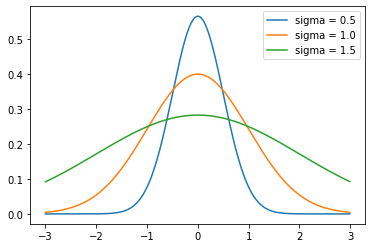

In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.01)
u=0
sigma = 0.5
fx1 = 1/(math.sqrt(2*math.pi*sigma)) * np.exp(-(x-u)**2/(2*sigma**2))
sigma = 1
fx2 = 1/(math.sqrt(2*math.pi*sigma)) * np.exp(-(x-u)**2/(2*sigma**2))
sigma = 2
fx3 = 1/(math.sqrt(2*math.pi*sigma)) * np.exp(-(x-u)**2/(2*sigma**2))
plt.plot(x, fx1, label="sigma = 0.5")
plt.plot(x, fx2, label="sigma = 1.0")
plt.plot(x, fx3, label="sigma = 1.5")
plt.legend()

## シグマ区間
正規分布において$[-\sigma, \sigma]$を1σ区間と言う。
* 1σ区間に入る確率：約68.27%
* 2σ区間に入る確率：約95.45%
* 3σ区間に入る確率：約99.73%

となる。もう少し詳しく記載すると、確率変数$X$が正規分布$N(\mu, \sigma^2)$に従うとき、

$$ P(\mu-\sigma\leq X\leq \mu+\sigma)\fallingdotseq 0.6827 $$

と表現される。グラフで図示すると下記の通りで塗りつぶされた領域の面積が0.6827となる。


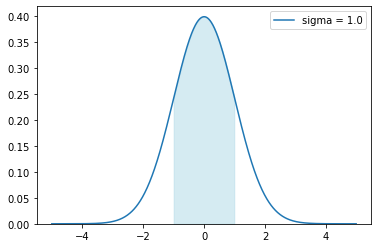

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.01)
u=0
sigma = 1
fx = 1/(math.sqrt(2*math.pi*sigma)) * np.exp(-(x-u)**2/(2*sigma**2))
plt.plot(x, fx, label="sigma = 1.0")
plt.fill_between( x[400:600], fx[400:600], color="lightblue", alpha=0.5)
plt.ylim(0,)
plt.legend()

先述した確率は数学的には積分すると求めることが出来るが、非常に難しい。従って通常は予め計算された表かソフトウェアで計算する。ここでもpythonを利用して計算する。

In [14]:
from scipy.stats import norm

sigma = 1
cdf1 = norm.cdf(x=sigma, loc=0, scale=1)
cdf2 = norm.cdf(x=-sigma, loc=0, scale=1)
p = cdf1 - cdf2
print("sigma = 1: ", p)
sigma = 2
cdf1 = norm.cdf(x=sigma, loc=0, scale=1)
cdf2 = norm.cdf(x=-sigma, loc=0, scale=1)
p = cdf1 - cdf2
print("sigma = 2: ", p)
sigma = 3
cdf1 = norm.cdf(x=sigma, loc=0, scale=1)
cdf2 = norm.cdf(x=-sigma, loc=0, scale=1)
p = cdf1 - cdf2
print("sigma = 3: ", p)

sigma = 1:  0.6826894921370859
sigma = 2:  0.9544997361036416
sigma = 3:  0.9973002039367398
